In [1]:
# Kenneth Meyer
# 2/25/23
# CSE386L hw3 - coding question

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## defining variables for the problem (Q5) ##
A_1 = np.array([[1,0.5],[0.5,2]])
f_1 = np.array([1.5,2.5])
A_2 = np.array([[1,0.5],[0.5,100]])
f_2 = np.array([1.5,100.5])

In [15]:
## computation of minimizer x* ##
x_1_opt = np.linalg.inv(A_1.T @ A_1) @ A_1.T @ f_1
x_2_opt = np.linalg.inv(A_2.T @ A_2) @ A_2.T @ f_2
print("Minimizer for Case I least sqaures problem:")
print(x_1_opt)
print("Minimizer for Case II least squares problem:")
print(x_2_opt)

Minimizer for Case I least sqaures problem:
[1. 1.]
Minimizer for Case II least squares problem:
[1. 1.]


In [32]:
## implementation of steepest gradient descent ##
def gradient_descent(x_0,A,f,x_opt,tol=1e-6,it_max=1e8):
    '''
        Computes steepest gradient descent for least squares problem Ax - f
        
        PARAMETERS
        ----------
        A : matrix
        f : f
        x_opt : known optimal value of x
        tol : tolerance
        it_max : maximum iterations to run
        
        OUTPUT
        ------
        error
        cost function evaluations
    '''
    
    # comments:
    #        this function assumes the optimal value of x is known
    #        can easily edit this, just need to not compute error
    #        ^ computing error on the fly to minimize storage required
    
    cost = lambda A,x,f : np.linalg.norm(A @ x - f,ord=2)**2
    grad_cost = lambda A,x,f : A.T @ (A @ x - f)
    x_i = x_0 # initialize the algorithm with the initial guess
    
    # initialize variables to save values to
    cost_vals = []
    grad_cost_vals = []
    error = [] # precompute error to make things easier
    
    # chose to use a for loop with a max iteration #, while loop works too.
    for i in range(0,int(it_max)):
        # precompute values to use
        cost_i = cost(A,x_i,f)
        grad_cost_i = grad_cost(A,x_i,f)
        cost_vals.append(cost_i)
        grad_cost_vals.append(np.linalg.norm(grad_cost_i,ord=2)) # want norm of this vector to plot
        err = np.linalg.norm(x_i - x_opt,ord=2)
        error.append(err)
        
        # exit early/don't compute the next step if the current step is less than the tolerance!
        if np.linalg.norm(grad_cost_i,ord=2) < tol:
            break # evaluation of cost function and its gradient have already been saved
        else:
            # backtracking - computes the next step
            delta = 1
            x1_temp = x_i - delta*grad_cost_i
            # cost_i was already computed
            while cost(A,x1_temp,f) >= cost_i:
                delta = delta/2
                x1_temp = x_i - delta*grad_cost_i
        
            x_i = x1_temp    
    
    return np.array(cost_vals), np.array(grad_cost_vals), np.array(error)

In [33]:
# run initial steepest gradient descent using same tolerance

# inputs (tolerance, initial guess, actual solution)
tol = 1e-6
x0 = np.array([0.0,0.0])
x_opt = np.array([1.0,1.0]) # same for both cases

# run method
cost1,grad_cost1,err1 = gradient_descent(x0,A_1,f_1,x_opt,tol=tol)
cost2,grad_cost2,err2 = gradient_descent(x0,A_2,f_2,x_opt,tol=tol)

In [34]:
# checking convergence
n_its_1 = cost1.shape[0]
n_its_2 = cost2.shape[0]
print("Case I took " + str(n_its_1) + " iterations to converge")
print("Case II took " + str(n_its_2) + " iterations to converge")

Case I took 39 iterations to converge
Case II took 45212 iterations to converge


In [61]:
# plotting the results - case I !!
def plot_gradient(cost,grad_cost,err,tol,case,skip_its=0):
    n_its = err.shape[0]
    its = np.arange(skip_its,n_its) # irgnore initial guess, skews plot
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.semilogy(its,cost[skip_its:])
    ax.semilogy(its,grad_cost[skip_its:])
    ax.semilogy(its,err[skip_its:])
    ax.legend(["Cost", "Gradient Norm", "L2 Error"])
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Cost and Error")
    ax.set_title("Case " + case + " steepest descent with tolerance of " + tol)
    
    return fig,ax

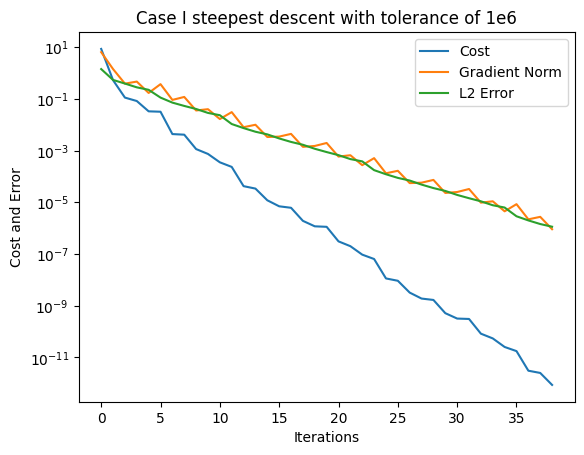

In [62]:
fig1,ax1 = plot_gradient(cost1,grad_cost1,err1,"1e6","I")
plt.show()

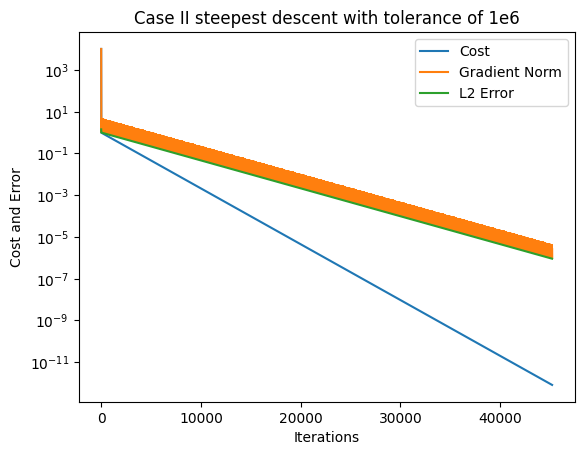

In [63]:
fig2,ax2 = plot_gradient(cost2,grad_cost2,err2,"1e6","II")
plt.show()

In [64]:
# running the cases with a smaller tolerance!!
# inputs (tolerance, initial guess, actual solution)
tol = 1e-8
x0 = np.array([0.0,0.0])
x_opt = np.array([1.0,1.0]) # same for both cases

# run method
cost1,grad_cost1,err1 = gradient_descent(x0,A_1,f_1,x_opt,tol=tol)
cost2,grad_cost2,err2 = gradient_descent(x0,A_2,f_2,x_opt,tol=tol)

In [68]:
# checking convergence
n_its_1 = cost1.shape[0]
n_its_2 = cost2.shape[0]
print("Case I took " + str(n_its_1) + " iterations to converge")
print("Case II took " + str(n_its_2) + " iterations to converge")

Case I took 54 iterations to converge
Case II took 60182 iterations to converge


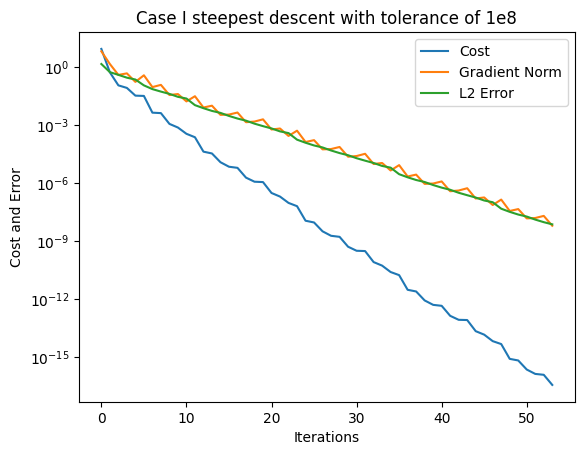

In [66]:
fig1,ax1 = plot_gradient(cost1,grad_cost1,err1,"1e8","I")
plt.show()

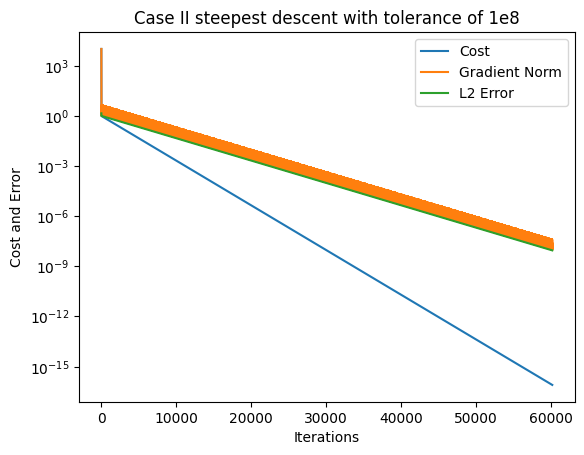

In [67]:
fig2,ax2 = plot_gradient(cost2,grad_cost2,err2,"1e8","II")
plt.show()

In [69]:
# even smaller!!!
# running the cases with a smaller tolerance!!
# inputs (tolerance, initial guess, actual solution)
tol = 1e-10
x0 = np.array([0.0,0.0])
x_opt = np.array([1.0,1.0]) # same for both cases

# run method
cost1,grad_cost1,err1 = gradient_descent(x0,A_1,f_1,x_opt,tol=tol)
cost2,grad_cost2,err2 = gradient_descent(x0,A_2,f_2,x_opt,tol=tol)

In [70]:
# checking convergence
n_its_1 = cost1.shape[0]
n_its_2 = cost2.shape[0]
print("Case I took " + str(n_its_1) + " iterations to converge")
print("Case II took " + str(n_its_2) + " iterations to converge")

Case I took 69 iterations to converge
Case II took 75120 iterations to converge


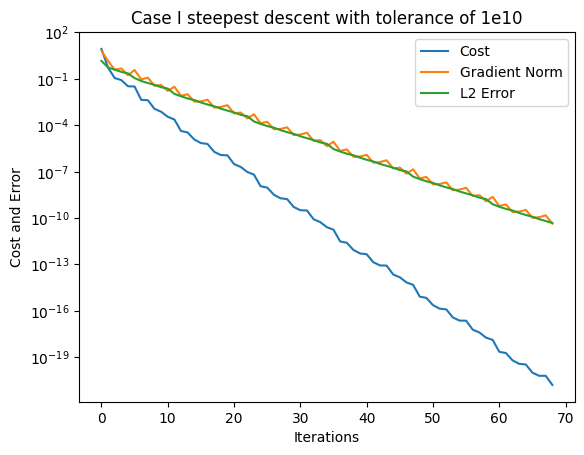

In [71]:
fig1,ax1 = plot_gradient(cost1,grad_cost1,err1,"1e10","I")
plt.show()

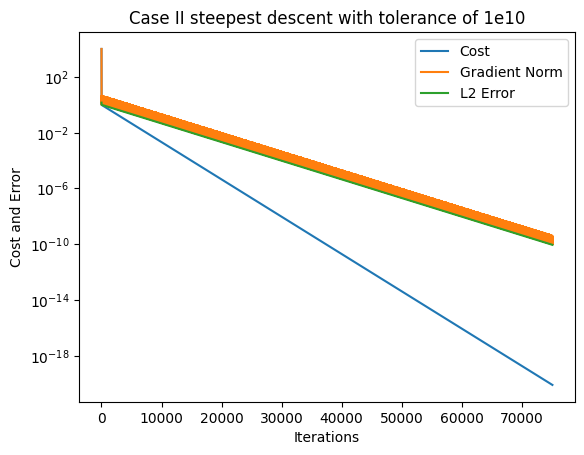

In [72]:
fig2,ax2 = plot_gradient(cost2,grad_cost2,err2,"1e10","II")
plt.show()

# Discussion #
The cost and L2 error decrease monotomically, which is expected as the steepest gradient descent is known to only take steps closer to the true solution. The Gradient norm does not decrease monotomically, which also makes sense as the rate at which our guess $x_i$ decreases is not constant.

The second cause takes more iterations to stop because the problem is inherently more ill-conditioned in the sense that the matrix A has values with very different orders of magnitude. The values of the gradients will differ by orders of magnitude for the x1 and x2 positions in the x array, which impedes convergence; this is related to the slow-fast problem (I think)